## Assignment 2


Die Ergebnisse aus Assignment 1 haben beim Auftraggeber zur Vermutung geführt, dass der hohe Ausschuss
der Bremszylinder durch zu geringe Federkräfte der eingesetzten Federn zu erklären ist.
Im Bremszylinder werden 8 Federpakete mit jeweils 3 Federn unterschiedlicher Federsteifigkeit verwendet.
Mit einer zulässigen Toleranz der Fersteifigkeiten von +-10% ergeben sich folgende Werte:

Federsteifigkeit c1 = 100 N/mm +- 10 N/mm
                 c2 = 150 N/mm +- 15 N/mm
                 c3 = 200 N/mm +- 20 N/mm
                 
Da keine Messwerte vom Auftraggeber mitgeteilt wurden, werden in den folgenden Schritten Federsteifigkeiten simuliert und normalverteilt toleriert.
Im nächsten Schritt werden die erzeugten Federn in Federpaketen zusammengesetzt und die resultierenden Federkräfte auf Zulässigkeit überprüft.
                        



## Importierung der notwendigen Bilbliotheken.

In [158]:
# OS to use file system
import os
# Matplotlib and the pyplot module for a Matlab-like plot syntax
import matplotlib
# This is the syntax to import as a named module
import matplotlib.pyplot as plt
# Numpy for higher level mathematics
import numpy as np
# Special module for a very quick analysis
import pandas as pd
# Beautiful plots
import seaborn as sns
# Plot the graphs in the notebook
%matplotlib inline
from scipy.stats import norm

## Simulation der Federn, Variante 1

Der Befehl [np.random.rand(N,M)] erzeugt M Spalten mit N Werten zwischen 0 und 1.
Mit N = int(1e6) und M = 1 werden 10^6 Werte in einer Spalte generiert. 
Durch die Substraktion mit 0,5, der anschließenden Multiplikation mit 0,2 und Addition mit 1 entstehen Werte zwischen 0,9 und 1,1. 
Die abschließende Multiplikation mit 100 resultiert in generierten Werten zwischen 90 und 110. Dies entspricht den Normwerten der ersten Federkraft inklusive poitiver und negativer Toleranz von 10%.
Dies wird analog für die Federn c2 und c3 angewendet. 
Beispielhaft durch [100*(1+0.2*(np.random.rand(N,1)-0.5))] dargestellt.



In [159]:
100*(1+0.2*(np.random.rand(N,1)-0.5))


array([[104.9702808 ],
       [ 90.94205563],
       [ 91.01008459],
       ...,
       [ 98.56259197],
       [101.87440625],
       [ 90.77640777]])

In [160]:
#Fix random generator for repeatability
np.random.rand(42)
# Number of simulations
N = int(1e6)
c1 = 100*(1+0.2*(np.random.rand(N,1)-0.5))
c2 = 150*(1+0.2*(np.random.rand(N,1)-0.5))
c3 = 200*(1+0.2*(np.random.rand(N,1)-0.5))

Ein Bremszylinder besteht aus 8 Federpaketen mit jeweils 3 unterschiedlichen Federsteifigkeiten.
[czus = 8*c1 + 8*c2 + 8*c3] simuliert diese zusammengesetzten Federpakete.

In [161]:
czus = 8*c1 + 8*c2 + 8*c3

Die Funktion [sns.distplot(czus)] visualisiert die Normalverteilung der Verteilung der summierten Federkräfte pro Federpaket.
Einen Überblick der wichtigsten statistischen Kennwerte liefert der Befehl [df.describe()], welcher bereits im 1sten Assignment Anwendung fand.

E:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


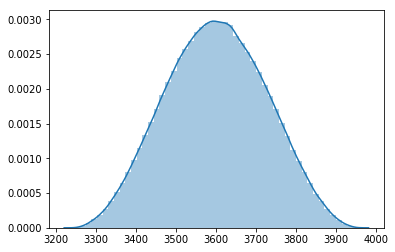

In [162]:
sns.distplot(czus)

In [163]:
df = pd.DataFrame(data=czus)
df.describe()

,0
count,1000000.000000
mean,3599.842863
std,124.322070
min,3244.637849
25%,3510.303674
50%,3599.656982
75%,3689.365305
max,3956.265008


Es ist zu erkennen, dass die normalverteilten Federkräfte der zusammengesetzten Federpakete um einen Mittelwert von 3600.085479 variieren.
Die Standartabweichung beträgt ca. 124 N/mm. 

## Abweichung der Federkräfte von mehr als +- 5%

Die Eingangs durch [from scipy.stats import norm] initialisierte Statistik Bibliothek ermöglicht eine adequate Berechnung der Warscheinlich, dass der Nominalwert der komulierten Federkräfte mit mehr als +- 5% abweicht. Die nächsten Zeilen beschreiben 
die verwendeten Funktionen der Statistik Bilbliothek:

    Mittelwert der Grundgesamtheit czus  MW = np.mean(czus)
    Standartabweichung von czus       sigma = np.std(czus)
    
Des weiteren werden verwendet:

    Nominalwert des Federpaketes         NV = 8*100 + 8*150 + 8*200
    Oberes Limit von czus                OL = 1.05 * czus
    Unteres Limit von Czus               UL = 0.95 * czus  

In [164]:
MW = np.mean(czus)
sigma = np.std(czus)
NV = 8*100 + 8*150 + 8*200
OL = 1.05 * NV
UL = 0.95 * NV
MW, NV, sigma, UL, OL

(3599.842863033249, 3600, 124.32200800298467, 3420.0, 3780.0)

Um nun die Warscheinlichkeit zu bestimmen, ob die komulierte Federkraft kleiner als UL oder größer als OL ist, werden 
die Funktionen: 

    [norm.cdf(UL,MW,sigma)] & [1-norm.cdf(OL,MW,sigma)] verwendet.
    
Die Summe der Ergebnisse beider Funktionen multipliziert mit 100 entspricht der Warscheinlichkeit.

In [165]:
WU = norm.cdf(UL,MW,sigma)
WO = 1- norm.cdf(OL,MW,sigma)
W = (WO + WU) *100
W

14.765847260698962

In [166]:
Die Warscheinlichkeit beträgt somit 14.76 %.

SyntaxError: invalid syntax (<ipython-input-166-9ff4bb8cff44>, line 1)

## Ausschuss berechnen

Jeder Bremszylinder mit einer komulierten Federkraft <3380 N/mm ist Ausschuss. Wieviel Prozent der Charge wäre das ? 
Auch dies kann einfach mit der Funktion:
    norm.cdf(d,MW,sigma) 
berechnet werden. 
Hierbei stellt d die minimale Federkraft von 3380 N/mm dar.

In [170]:
d=3380
M = norm.cdf(d,MW,sigma)*100
M

3.850252183568792

3.84 % der Charge wäre Ausschuss.

## Simulation der Federn, Variante 2

In [171]:
#Fix random generator for repeatability
np.random.rand(42)
# Number of simulations
N = int(1e6)
c1_2 = 100*(1+0.2*(np.random.rand(N,1)-0.5))
c2_2 = 150*(1+0.2*(np.random.rand(N,1)-0.5))
c3_2 = 190+(10*(np.random.rand(N,1)-1))
c3_2

array([[188.18225092],
       [182.63021296],
       [180.28031086],
       ...,
       [189.2815094 ],
       [182.25998198],
       [188.34584698]])

E:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


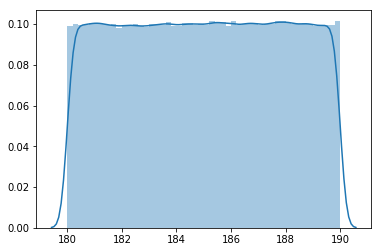

In [172]:
sns.distplot(c3_2)

E:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


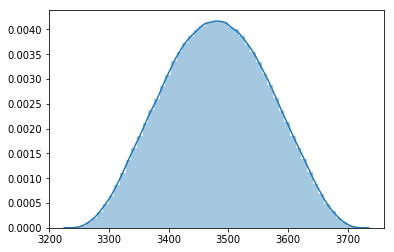

In [173]:
czus_2 = 8*c1_2 + 8*c2_2 + 8*c3_2
sns.distplot(czus_2)

In [174]:
df = pd.DataFrame(data=czus_2)
df.describe()

,0
count,1000000.000000
mean,3480.179748
std,86.343662
min,3242.175799
25%,3416.887310
50%,3480.113697
75%,3543.506805
max,3717.798061


Es ist zu erkennen, dass der Mittelwert der Kraft des zusammengesetzten Federpakets minimiert wurde. 
Der Wert liegt nun bei 3480.13 N/mm.
Nun folgt wie im ersten Teil die Berechnung der Warscheinlichkeit der Abweichung des Nominalwertes der Gesamtkraft der Feder um mehr als +- 5%.

In [175]:
MW_2 = np.mean(czus_2)
sigma_2 = np.std(czus_2)
NV_2 = 8*100 + 8*150 + 8*200
OL_2 = 1.05 * NV_2
UL_2 = 0.95 * NV_2
MW_2, NV_2, sigma_2, UL_2, OL_2

(3480.1797478694216, 3600, 86.3436192438393, 3420.0, 3780.0)

In [176]:
WU_2 = norm.cdf(UL_2,MW_2,sigma_2)
WO_2 = 1- norm.cdf(OL_2,MW_2,sigma_2)
W_2 = (WO_2 + WU_2) *100
W_2

24.31656622645571

Im Gegensatz zur Variante 1 hat sich die Warscheinlichkeit um knapp 10% auf 24,32% erhöht.

## Ausschuss berechnen

In [178]:
d=3380
M_2 = norm.cdf(d,MW_2,sigma_2)*100
M_2

12.297454608518926

Der Ausschuss wird beinahe vervierfacht auf 12.3%.

## EoL-Analyse 

Bei einer Warscheinlichkeit einer zu geringen Gesamtkraft des Bremszylinders von 1ppm im unbenutzten Zustand hat keine Aussage darüber, wie sich die Federkräfte im EoL-Test verhalten. Es wäre möglich, dass die Federn bei Dauerbelastung an Steifigkeit verlieren oder gar brechen.
Somit ist eine EoL-Analyse anzuraten.